<a href="https://colab.research.google.com/github/softmurata/Image2VideoML/blob/main/animate_anything.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/alibaba/animate-anything.git

In [ ]:
%cd /content/animate-anything/
!pip install -r requirements.txt

In [ ]:
!wget https://cloudbook-public-production.oss-cn-shanghai.aliyuncs.com/animation/animate_anything_512_v1.02.tar

In [ ]:
!tar -xvf /content/animate-anything/animate_anything_512_v1.02.tar

In [5]:
import os
os.makedirs("/content/animate-anything/output/latent/", exist_ok=True)
!mv /content/animate-anything/animate_anything_512_v1.02 /content/animate-anything/output/latent/

In [ ]:
%cd /content/animate-anything
!python train.py --config output/latent/animate_anything_512_v1.02/config.yaml --eval validation_data.prompt_image=example/barbie2.jpg validation_data.prompt='A cartoon girl is talking.'

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/animate-anything/output/demo/barbie2/0.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="100%" height="100%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

Another Samples

In [ ]:
!wget https://cdn-ak.f.st-hatena.com/images/fotolife/t/touch-sp/20231218/20231218161528.jpg -O /content/concat.jpg

In [11]:
from PIL import Image

def split_image_horizontally(image_path, output_path1, output_path2):
    # 画像を読み込み
    original_image = Image.open(image_path)

    # 画像のサイズを取得
    width, height = original_image.size

    # 画像を横方向に2分割
    left_image = original_image.crop((0, 0, width // 2, height))
    right_image = original_image.crop((width // 2, 0, width, height))

    # 分割された画像を保存
    left_image.save(output_path1)
    right_image.save(output_path2)

# 例: 画像を横方向に2分割して保存
input_image_path = "/content/concat.jpg"
output_image_path1 = "/content/rgb.jpg"
output_image_path2 = "/content/mask.jpg"

split_image_horizontally(input_image_path, output_image_path1, output_image_path2)


In [16]:
!cp /content/rgb.jpg /content/animate-anything/example/rgb.jpg
!cp /content/mask.jpg /content/animate-anything/example/rgbmask.jpg

In [ ]:
# config.yaml
"""
pretrained_model_path: output/latent/animate_anything_512_v1.02
output_dir: ./output/latent
train_data:
  width: 512
  height: 512
  use_bucketing: false
  return_mask: true
  return_motion: true
  sample_start_idx: 1
  fps: 8
  n_sample_frames: 16
  json_path: /webvid/animation0.json
validation_data:
  prompt: closeup face photo of japanese woman in black clothes, night city street, bokeh, fireworks in background
  prompt_image: example/rgb.jpg
  mask: example/rgbmask.jpg
  sample_preview: true
  num_frames: 16
  fps: 4
  width: 512
  height: 512
  num_inference_steps: 25
  guidance_scale: 9
dataset_types:
- json
shuffle: true
validation_steps: 200
trainable_modules:
- all
- attn1
- conv_in
- temp_conv
- motion
not_trainable_modules: []
trainable_text_modules: null
extra_unet_params: null
extra_text_encoder_params: null
train_batch_size: 4
max_train_steps: 10000
learning_rate: 5.0e-06
scale_lr: false
lr_scheduler: constant
lr_warmup_steps: 0
adam_beta1: 0.9
adam_beta2: 0.999
adam_weight_decay: 0
adam_epsilon: 1.0e-08
max_grad_norm: 1.0
gradient_accumulation_steps: 1
gradient_checkpointing: true
text_encoder_gradient_checkpointing: false
checkpointing_steps: 2000
resume_from_checkpoint: null
resume_step: null
mixed_precision: fp16
use_8bit_adam: false
enable_xformers_memory_efficient_attention: false
enable_torch_2_attn: true
seed: null
train_text_encoder: false
use_offset_noise: false
rescale_schedule: false
offset_noise_strength: 0.1
extend_dataset: false
cache_latents: false
cached_latent_dir: null
lora_version: cloneofsimo
save_lora_for_webui: true
only_lora_for_webui: false
lora_bias: none
use_unet_lora: false
use_text_lora: false
unet_lora_modules:
- UNet3DConditionModel
text_encoder_lora_modules:
- CLIPEncoderLayer
save_pretrained_model: true
lora_rank: 16
lora_path: ''
lora_unet_dropout: 0.1
lora_text_dropout: 0.1
logger_type: tensorboard
motion_mask: true
motion_strength: true
kwargs: {}
"""

In [ ]:
%cd /content/animate-anything
# train.py: 1037 -> mask = Image.open(validation_data.mask).convert("L")
!python train.py --config configs/config.yaml --eval

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/animate-anything/output/demo/rgb/3.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="100%" height="100%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

Wedding

In [ ]:
# マスクを生成してからのpipelineを見せつけたい

In [8]:
from transformers import AutoModelForUniversalSegmentation, AutoProcessor
import torch
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "shi-labs/oneformer_ade20k_swin_large"
model = AutoModelForUniversalSegmentation.from_pretrained(model_id).to(device)
processor = AutoProcessor.from_pretrained(model_id)

/usr/local/lib/python3.10/dist-packages/transformers/models/oneformer/image_processing_oneformer.py:417: FutureWarning: The `reduce_labels` argument is deprecated and will be removed in v4.27. Please use `do_reduce_labels` instead.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


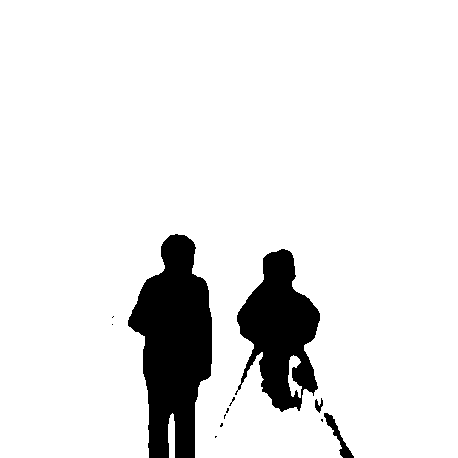

In [9]:
import numpy as np
import cv2
img_path = "/content/animate-anything/example/wedding.jpg"
target_name = "person"
image = Image.open(img_path).convert("RGB")
semantic_inputs = processor(images=image, task_inputs=["semantic"], return_tensors="pt").to(device)

# forward pass
with torch.no_grad():
  outputs = model(**semantic_inputs)

semantic_segmentation = processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
semantic_segmentation = semantic_segmentation.detach().cpu().numpy()

target_id = model.config.label2id[target_name]

label_pred_map = np.where(semantic_segmentation == target_id, 255, 0)
label_pred_map = 255 - label_pred_map
cv2.imwrite("/content/animate-anything/example/weddingmask.jpg", label_pred_map)
display(Image.fromarray(label_pred_map.astype(np.uint8)))

In [14]:
# with mask
%cd /content/animate-anything
!python train.py --config configs/wedding_mask.yaml --eval

/content/animate-anything
2023-12-26 11:18:50.030632: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 11:18:50.030681: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 11:18:50.035698: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-26 11:18:51.305792: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Initializing the conversion map
The config attributes {'force_upcast': True} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
motion mask Tru

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/animate-anything/output/demo/wedding/1.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="100%" height="100%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

In [ ]:
!wget https://zexy.net/contents/wedding/wonderful/0103/images/AA1_1.jpg -O /content/animate-anything/example/wedding.jpg

In [ ]:
!wget https://zexy.net/pa/7770008920/01/2275785_458.jpg -O /content/animate-anything/example/wedding.jpg

In [ ]:
%cd /content/animate-anything
!python train.py --config configs/wedding.yaml --eval

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/animate-anything/output/demo/wedding/1.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="100%" height="100%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")